In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # type: ignore
from tensorflow.keras.models import load_model # type: ignore

# Load the trained model
model1 = load_model("airline_profit_model.h5")
model2 = load_model("airline_profit_model2.h5")

In [40]:
import pandas as pd
import numpy as np
df=pd.read_csv("flight_data.csv")
df.head(3)

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61


In [41]:
df['Scheduled Departure Time'] = pd.to_datetime(df['Scheduled Departure Time'])
df['Actual Departure Time'] = pd.to_datetime(df['Actual Departure Time'])
df['Departure Delay (minutes)'] = (df['Actual Departure Time'] - df['Scheduled Departure Time']).dt.total_seconds() / 60
df['Flight Number'] = df['Flight Number'].str.extract(r'(\d+)').astype(int)  # One-Hot Encoding
df.head(3)

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD),Departure Delay (minutes)
0,885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84,72887.55
1,930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84,238797.35
2,478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61,271662.25


In [42]:
X = df.drop(columns=["Profit (USD)"])
y = df["Profit (USD)"]
X.head(3)

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Departure Delay (minutes)
0,885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,72887.55
1,930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,238797.35
2,478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,271662.25


In [43]:
from sklearn.preprocessing import StandardScaler

numerical_features = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])
X_scaled

array([[ 1.33532218, -0.26989468,  0.15422512, ..., -1.0469175 ,
         0.11741361,  0.34329401],
       [ 1.49126401, -0.93317892,  1.09282271, ...,  0.04476068,
        -1.4776418 ,  1.12571968],
       [-0.07508498,  1.40273513, -0.5508044 , ..., -0.93036846,
         0.23066116,  1.28070957],
       ...,
       [ 0.06699535,  0.68177401,  0.34453984, ...,  0.40252378,
        -0.47167781, -0.93217841],
       [ 0.29571002, -0.12570246,  0.22775581, ..., -1.22961549,
        -0.72452894,  0.22291612],
       [ 0.31303689,  1.43157358, -1.67106603, ..., -0.87259627,
        -0.09004854,  0.35899662]])

In [48]:
# Predict profitability
predictions1 = model1.predict(X_scaled)
predictions2 = model2.predict(X_scaled)
for i in range(5):
    print(f"1. Actual: {y.iloc[i]:.2f}, Predicted: {predictions1[i][0]:.2f}")
    print(f"2. Actual: {y.iloc[i]:.2f}, Predicted: {predictions2[i][0]:.2f}")

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 772us/step
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 767us/step
1. Actual: -16893.84, Predicted: -16904.37
2. Actual: -16893.84, Predicted: -16902.23
1. Actual: 30032.84, Predicted: 30030.58
2. Actual: 30032.84, Predicted: 30027.04
1. Actual: -16794.61, Predicted: -16805.14
2. Actual: -16794.61, Predicted: -16802.47
1. Actual: 26468.92, Predicted: 26472.63
2. Actual: 26468.92, Predicted: 26467.31
1. Actual: -23137.50, Predicted: -23140.86
2. Actual: -23137.50, Predicted: -23143.39


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute metrics
mae1 = mean_absolute_error(y, predictions1)
rmse1 = np.sqrt(mean_squared_error(y, predictions1))
r21 = r2_score(y, predictions1)
mae2 = mean_absolute_error(y, predictions2)
rmse2 = np.sqrt(mean_squared_error(y, predictions2))
r22 = r2_score(y, predictions2)
print(f"For First Model")
print(f"Mean Absolute Error (MAE): {mae1:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse1:.2f}")
print(f"R² Score: {r21:.2f}")
print(f"For Second Model")
print(f"Mean Absolute Error (MAE): {mae2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse2:.2f}")
print(f"R² Score: {r22:.2f}")

For First Model
Mean Absolute Error (MAE): 3.80
Root Mean Squared Error (RMSE): 5.21
R² Score: 1.00
For Second Model
Mean Absolute Error (MAE): 3.94
Root Mean Squared Error (RMSE): 4.85
R² Score: 1.00


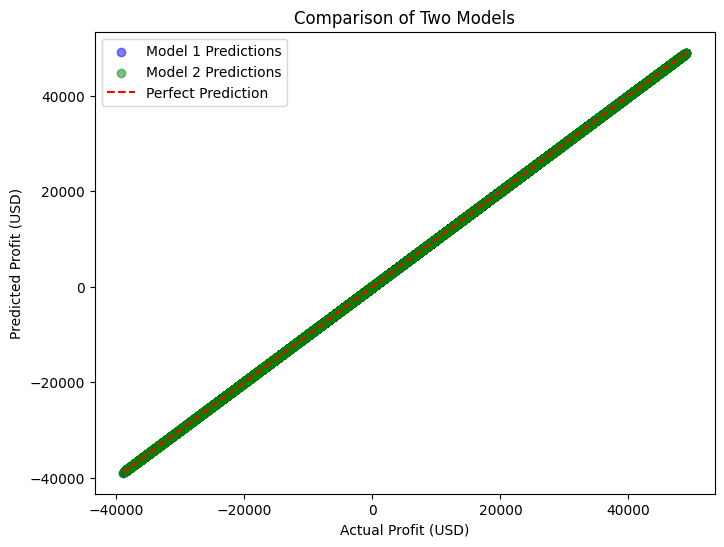

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(y, predictions1, alpha=0.5, label="Model 1 Predictions", color="blue")
plt.scatter(y, predictions2, alpha=0.5, label="Model 2 Predictions", color="green")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", label="Perfect Prediction")

plt.xlabel("Actual Profit (USD)")
plt.ylabel("Predicted Profit (USD)")
plt.title("Comparison of Two Models")
plt.legend()
plt.show()
